In [1]:
from torch import load
import numpy as np
import sys

sys.path.append('../..')

In [2]:
# If you haven't trained a model yet, please go to the file 'baryons_train.ipynb' first!
model = load('../../models/baryon_model_19.6gev.pt')
model.eval()

BaryonModel(
  (linear_in): Linear(in_features=141, out_features=256, bias=True)
  (linear_1): Linear(in_features=256, out_features=256, bias=True)
  (linear_2): Linear(in_features=256, out_features=141, bias=True)
  (leaky): LeakyReLU(negative_slope=0.01)
)

In [3]:
from hydroml.dataset import TrainDataset
from torch.utils.data import DataLoader

net_Baryons_19 = np.fromfile('../../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.3_wBulk_22momdeltaf_netBaryon.dat', dtype=np.float32)
net_Protons_19 = np.fromfile('../../datasets/training/NetbaryonDis_OSG3DAuAu19.6_tune18.3_wBulk_22momdeltaf_netProton.dat', dtype=np.float32)

dataset_19 = TrainDataset(net_Baryons_19, net_Protons_19, 141)

dataset = dataset_19

data_loader = DataLoader(
    dataset=dataset,
    batch_size=1,
    shuffle=True,
)

4999
Values for actual final state
Mean: 21.558256149291992
Mean (scipy): 1.4852544557723972
Mean Error: 0.3533157472263165
Standard Diviation: 24.978199005126953
Standard Error: 0.35328040777440306
Variance: 623.9104181499546 
Variance Error: 13.945210485795794
Skew: 1.2424762242021665
Skew Error: 7.608808418056725
Kurtosis: 3.497403952523291
Kurtosis Error: 97.79938802004402


Values for model output final state
Mean: 21.874677658081055
Mean (scipy): 2.6158102858005288
Mean Error: 0.3482284038215896
Standard Diviation: 24.618541717529297
Standard Error: 0.3481935769266123
Variance: 606.0726276731496 
Variance Error: 13.311751600867339
Skew: 1.207790905251652
Skew Error: 7.271876299898519
Kurtosis: 3.4115944181442868
Kurtosis Error: 91.75468629866317


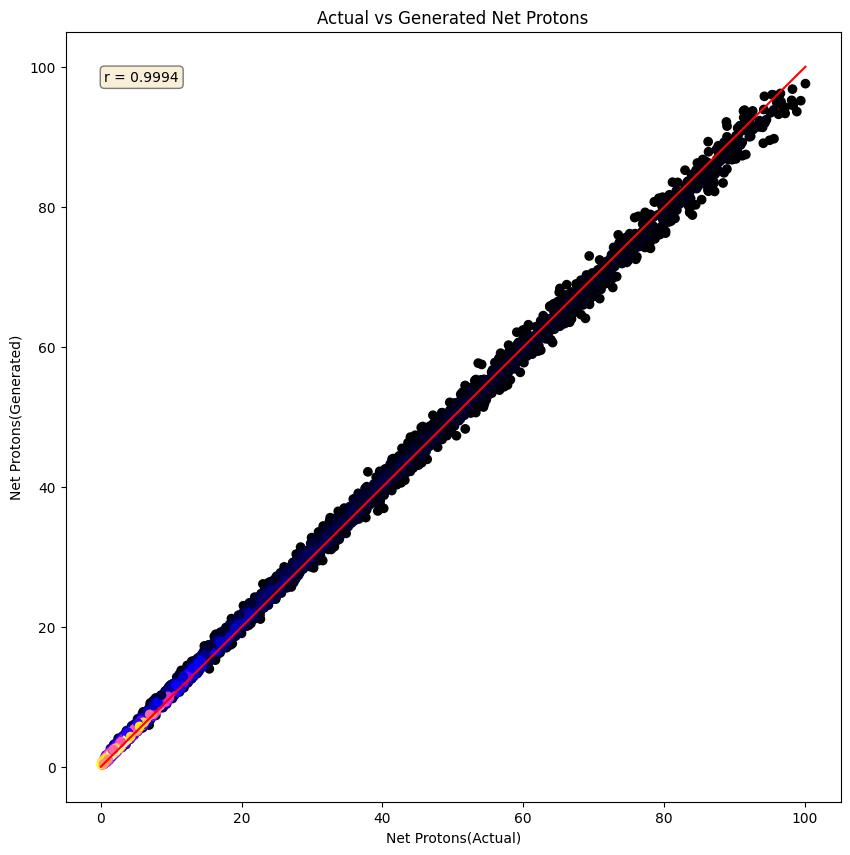

In [4]:
from hydroml.plot import plot_cc_graph, plot_output_compare, plot_output
from hydroml.moments import Moments
from hydroml.trim import trim

finals = []
models = []
bound_1 = -2
bound_2 = 2

import numpy as np

print(len(data_loader))

for i, data in enumerate(data_loader):
    key = data[0]
    value = data[1].flatten()

    protons_model = model(key)

    protons_model = protons_model.detach().numpy().flatten()

    eta_trim, protons_trim = trim( dataset.eta, value, bound_1, bound_2  )
    _, protons_model_trim = trim( dataset.eta, protons_model, bound_1, bound_2  )

    finals.append( np.trapz( protons_trim, x=eta_trim ) )
    models.append( np.trapz( protons_model_trim, x=eta_trim ) )

    # if i%100 == 0:
    #     #plot_output_compare(dataset.eta, protons_model, value, i)
    #     plot_output(dataset.eta, value, key)
    #     if i >= 50:
    #         break
    # if value.max() < 5.0:
    #      plot_output_compare(dataset.eta, protons_model, value, i)

finals_moments = Moments(finals)
models_moments = Moments(models)

print("Values for actual final state")
print(finals_moments)
print("\n")
print("Values for model output final state")
print(models_moments)

plot_cc_graph(np.array(finals), np.array(models), "Net Protons")